In [1]:
import numpy as np
import pandas as pd

In [2]:
pwd

'C:\\Users\\anike\\Downloads\\Placewit-ML-February2023-main\\SMS Spam Classifier'

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3293,ham,Beautiful tomorrow never comes.. When it comes...,NaN,NaN,NaN
3939,ham,Does daddy have a bb now.,NaN,NaN,NaN
447,ham,I wont get concentration dear you know you are...,NaN,NaN,NaN
1741,ham,I can do that! I want to please you both insid...,NaN,NaN,NaN
2772,ham,Still in customer place,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.size

27860

In [8]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building 
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last 3 columns (unnecessary)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# renaming the columns
df.rename(columns={'v1':'classification', 'v2':'text'},inplace=True)
df.head(7)

,classification,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


In [13]:
# label encoding of spam and ham
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df['classification']=encoder.fit_transform(df['classification'])

In [15]:
df.tail()

,classification,text
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [16]:
# missing values
df.isnull().sum()

classification    0
text              0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

403

In [18]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## 2. EDA

In [21]:
df.head(3)

,classification,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [22]:
df['classification'].value_counts()

0    4516
1     653
Name: classification, dtype: int64

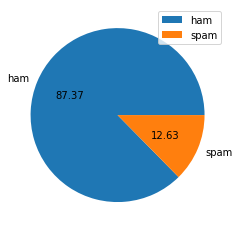

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['classification'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.legend()
plt.show()

In [24]:
# Data is imbalanced

In [25]:
!pip install nltk

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# fetching number of characters in each text message
df['num_of_chars']=df['text'].apply(len)

In [29]:
df.head()

,classification,text,num_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# number of words
df['num_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,classification,text,num_of_chars,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
# number of sentences
df['num_of_sents']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,classification,text,num_of_chars,num_of_words,num_of_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_of_chars', 'num_of_chars', 'num_of_chars']].describe()

,num_of_chars,num_of_chars,num_of_chars
count,5169.000000,5169.000000,5169.000000
mean,78.977945,78.977945,78.977945
std,58.236293,58.236293,58.236293
min,2.000000,2.000000,2.000000
25%,36.000000,36.000000,36.000000
50%,60.000000,60.000000,60.000000
75%,117.000000,117.000000,117.000000
max,910.000000,910.000000,910.000000


In [35]:
# ham messsages
df[df['classification']==0][['num_of_chars', 'num_of_chars', 'num_of_chars']].describe()

,num_of_chars,num_of_chars,num_of_chars
count,4516.000000,4516.000000,4516.000000
mean,70.459256,70.459256,70.459256
std,56.358207,56.358207,56.358207
min,2.000000,2.000000,2.000000
25%,34.000000,34.000000,34.000000
50%,52.000000,52.000000,52.000000
75%,90.000000,90.000000,90.000000
max,910.000000,910.000000,910.000000


In [36]:
# spam messsages
df[df['classification']==0][['num_of_chars', 'num_of_chars', 'num_of_chars']].describe()

,num_of_chars,num_of_chars,num_of_chars
count,4516.000000,4516.000000,4516.000000
mean,70.459256,70.459256,70.459256
std,56.358207,56.358207,56.358207
min,2.000000,2.000000,2.000000
25%,34.000000,34.000000,34.000000
50%,52.000000,52.000000,52.000000
75%,90.000000,90.000000,90.000000
max,910.000000,910.000000,910.000000


In [37]:
import seaborn as sns

<AxesSubplot:xlabel='num_of_chars', ylabel='Count'>

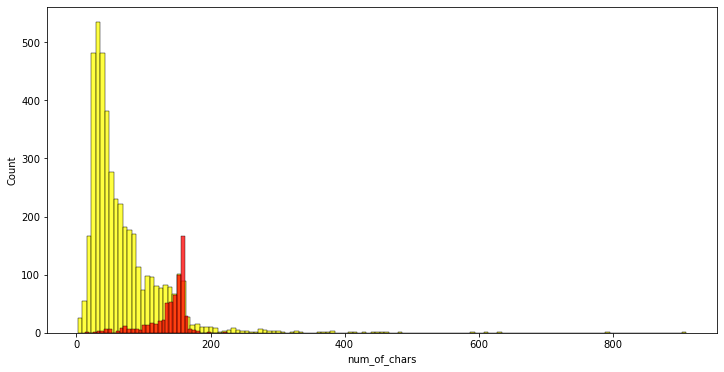

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['classification']==0]['num_of_chars'],color='yellow')
sns.histplot(df[df['classification']==1]['num_of_chars'],color='red')

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

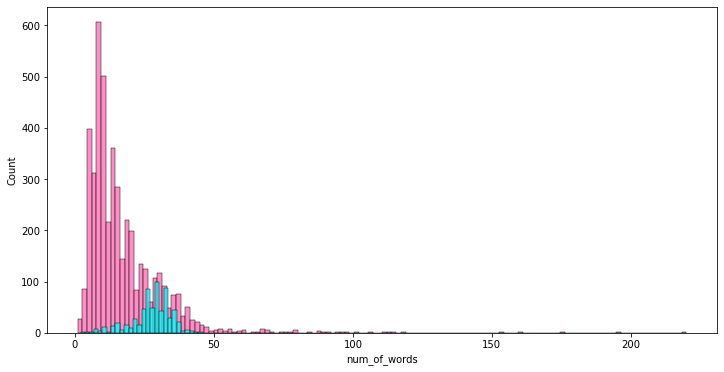

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['classification']==0]['num_of_words'],color='hotpink')
sns.histplot(df[df['classification']==1]['num_of_words'],color='cyan')

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

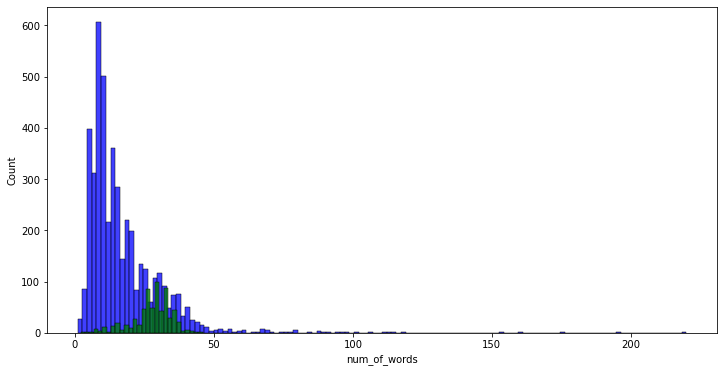

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['classification']==0]['num_of_words'],color='blue')
sns.histplot(df[df['classification']==1]['num_of_words'],color='green')

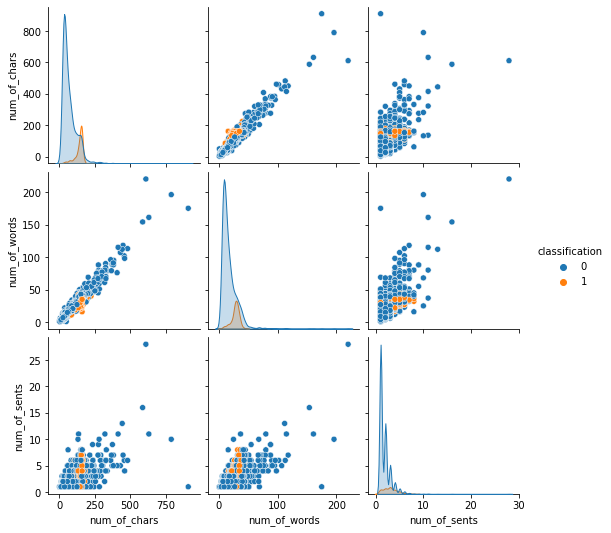

In [41]:
sns.pairplot(df,hue='classification')

### Correlation

In [42]:
df.corr()

,classification,num_of_chars,num_of_words,num_of_sents
classification,1.000000,0.384717,0.262984,0.284901
num_of_chars,0.384717,1.000000,0.965770,0.638143
num_of_words,0.262984,0.965770,1.000000,0.684541
num_of_sents,0.284901,0.638143,0.684541,1.000000


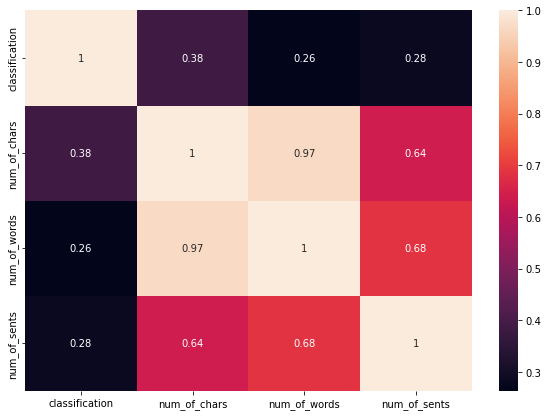

In [43]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

## 3. Data Proprocessing
    Lower case
    Tokenization
    Removing Special characters
    Removing stop words and punctuation
    Stemming

In [44]:
from nltk.corpus import stopwords

In [45]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string

In [47]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
# ps.stem('coding')

In [49]:
def transform_text(text):
    # lower casing
    text=text.lower()
    
    # tokenization
    text=nltk.word_tokenize(text)
    
    # removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    
    # removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    # stemming 
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [50]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [51]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [52]:
df['transformed_text']=df['text'].apply(transform_text)

In [53]:
df.head()

,classification,text,num_of_chars,num_of_words,num_of_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### wordcloud

In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=2000, height=1500, min_font_size=10, background_color='white')

In [55]:
spam_wc=wc.generate(df[df['classification']==1]['transformed_text'].str.cat(sep=" "))

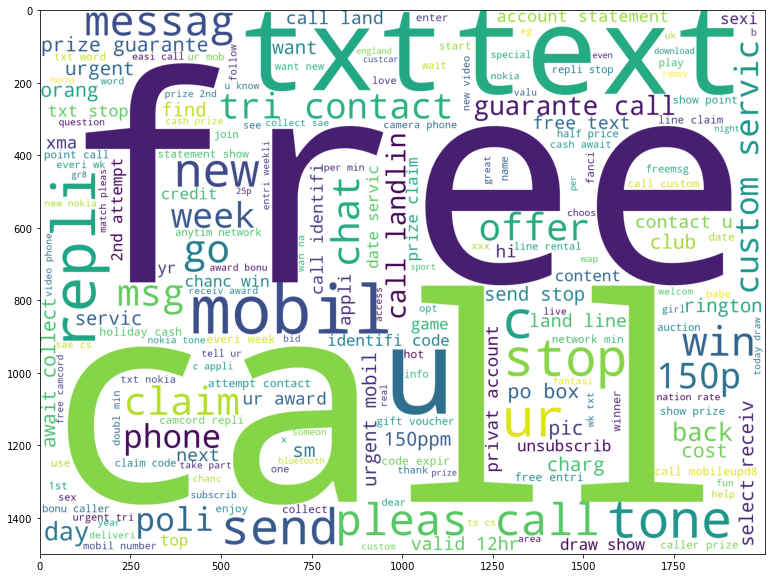

In [56]:
plt.figure(figsize=(14, 10))
plt.imshow(spam_wc)
# plt.axis('off')
plt.show()

In [57]:
wc = WordCloud(width=2000, height=1500, min_font_size=10, background_color='black')
ham_wc=wc.generate(df[df['classification']==0]['transformed_text'].str.cat(sep=" "))

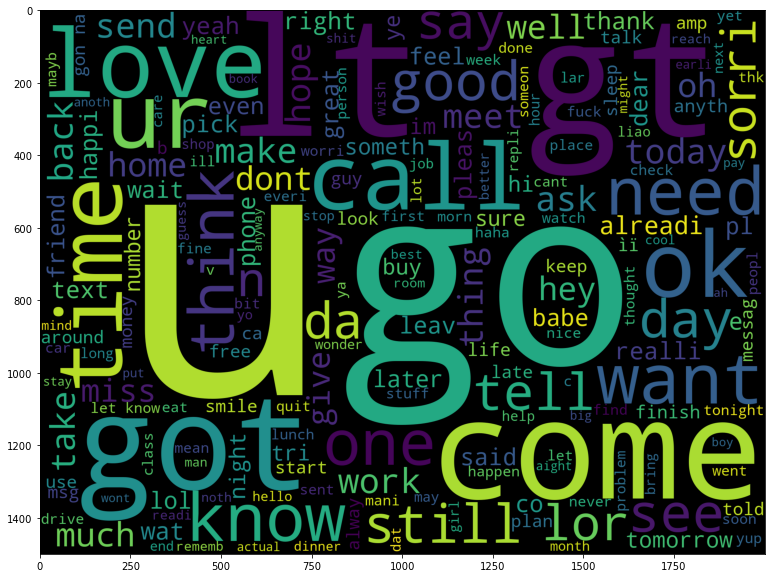

In [58]:
plt.figure(figsize=(14, 10))
plt.imshow(ham_wc)
# plt.axis('off')
plt.show()

In [59]:
df.head()

,classification,text,num_of_chars,num_of_words,num_of_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
df[df['classification']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [61]:
spam_corpus=[]
for msg in df[df['classification']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9939

In [63]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [64]:
pd.DataFrame(Counter(spam_corpus).most_common(10))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\anike\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


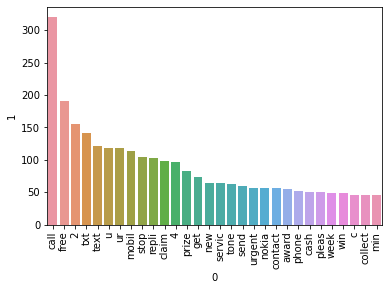

In [65]:
# top 30 words occuring in spam messages
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
 ham_corpus=[]
for msg in df[df['classification']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [67]:
len(ham_corpus)

35394

In [68]:
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [69]:
pd.DataFrame(Counter(ham_corpus).most_common(10))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\anike\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


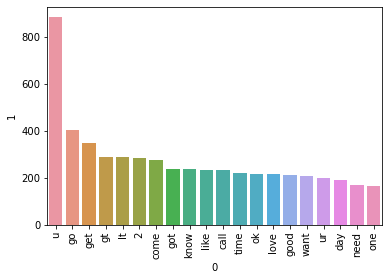

In [70]:
# top 20 words occuring in ham messages
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [71]:
# Text Vectorization
# using Bag of Words
df.head()

,classification,text,num_of_chars,num_of_words,num_of_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [72]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000) # for performance improvement max_features is used

In [73]:
# X=cv.fit_transform(df['transformed_text']).toarray() # for performance improvement tfidf used

In [74]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [75]:
#from sklearn.preprocessing import MinMaxScaler        # No performance improvement
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [76]:
# appending the num_character col to X                 # No performance improvement
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [77]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
X.shape

(5169, 3000)

In [79]:
y=df['classification'].values

In [80]:
y

array([0, 0, 1, ..., 0, 0, 0])

### train test split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

### Naive Bayes Algorithms

In [83]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [84]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [86]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [87]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [88]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [89]:
#  tfidf --> Multinomial Naive Bayes (Reduce False Positives in Email Spam Classification)

## Machine Learning Models

In [90]:
!pip install xgboost

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [92]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [93]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [94]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [95]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [96]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For -->",name,"----------------------------")
    print("Accuracy - ",current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For --> SVC ----------------------------
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For --> KN ----------------------------
Accuracy -  0.9052224371373307
Precision -  1.0
For --> NB ----------------------------
Accuracy -  0.9709864603481625
Precision -  1.0
For --> DT ----------------------------
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For --> LR ----------------------------
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For --> RF ----------------------------
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For --> AdaBoost ----------------------------
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For --> BgC ----------------------------
Accuracy -  0.9574468085106383
Precision -  0.8671875
For --> ETC ----------------------------
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For --> GBDT ----------------------------
Accuracy -  0.9477756286266924
Precision -  0.92
For --> xgb -

In [97]:
performance_df=pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [98]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [99]:
performance_dfv = pd.melt(performance_df, id_vars = "Algorithm")

In [100]:
performance_dfv

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


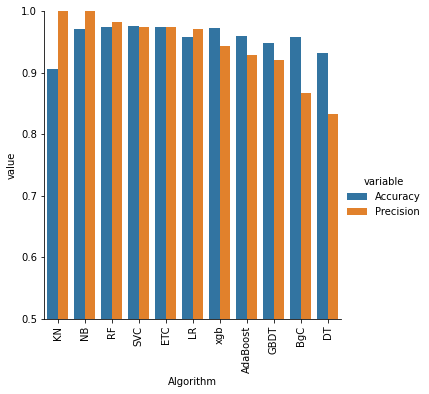

In [101]:
sns.catplot(x='Algorithm', y='value',hue='variable',data=performance_dfv,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Model Improvement

In [102]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [103]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [104]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [105]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [106]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [107]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188


In [108]:
# maximum accuracy and precision from Naive Bayes Algorithms usinf Tf-IDF (max_features=300) 

### Voting Classifier

In [109]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [110]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [111]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [112]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [113]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [114]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [115]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [116]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))